In [5]:
import yfinance as yf
from datetime import datetime

### Pulling data from yfinance API

In [6]:
# ticker = 'AAPL'
ticker = 'NVDA'
# start_date = datetime(year=2015, month=1, day=1)
start_date = datetime(year=2010, month=1, day=1)

In [7]:
df_stock = yf.download(
    tickers=ticker,
    start=start_date,
    interval='1d',
    group_by='ticker',
    auto_adjust=True,
    progress=False
)
df_stock

Ticker            NVDA                                               
Price             Open        High         Low       Close     Volume
Date                                                                 
2010-01-04    0.424265    0.426786    0.415097    0.423807  800204000
2010-01-05    0.422202    0.434580    0.422202    0.429995  728648000
2010-01-06    0.429766    0.433663    0.425640    0.432746  649168000
2010-01-07    0.430454    0.432287    0.421056    0.424265  547792000
2010-01-08    0.420827    0.428162    0.418306    0.425182  478168000
...                ...         ...         ...         ...        ...
2025-12-26  189.919998  192.690002  188.000000  190.529999  139740300
2025-12-29  187.710007  188.759995  185.910004  188.220001  120006100
2025-12-30  188.240005  188.990005  186.929993  187.539993   97687300
2025-12-31  189.570007  190.559998  186.490005  186.500000  120100500
2026-01-02  189.839996  192.929993  188.259995  188.850006  147941400

[4025 rows x 5 columns]

In [8]:
df_stock.tail(1)

Ticker            NVDA                                               
Price             Open        High         Low       Close     Volume
Date                                                                 
2026-01-02  189.839996  192.929993  188.259995  188.850006  147941400

In [4]:
df_stock = (
    df_stock
    .stack(level=0)
    .rename_axis(['Date', 'Ticker'])
    .reset_index()
)
df_stock

/var/folders/yr/_jfv6k1d3mbbs2syv46tt1y80000gn/T/ipykernel_35466/849327722.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(level=0)


Price       Date Ticker        Open        High         Low       Close  \
0     2010-01-04   NVDA    0.424265    0.426786    0.415097    0.423807   
1     2010-01-05   NVDA    0.422202    0.434579    0.422202    0.429995   
2     2010-01-06   NVDA    0.429766    0.433663    0.425640    0.432746   
3     2010-01-07   NVDA    0.430454    0.432287    0.421056    0.424265   
4     2010-01-08   NVDA    0.420827    0.428162    0.418306    0.425182   
...          ...    ...         ...         ...         ...         ...   
4014  2025-12-17   NVDA  176.100006  176.130005  170.309998  170.940002   
4015  2025-12-18   NVDA  174.529999  176.149994  171.820007  174.139999   
4016  2025-12-19   NVDA  176.669998  181.449997  176.339996  180.990005   
4017  2025-12-22   NVDA  183.919998  184.160004  182.350006  183.690002   
4018  2025-12-23   NVDA  182.960007  189.330002  182.899994  189.210007   

Price     Volume  
0      800204000  
1      728648000  
2      649168000  
3      547792000  
4      478168000  
...          ...  
4014   222775500  
4015   176096000  
4016   324925900  
4017   129064400  
4018   172498537  

[4019 rows x 7 columns]

### Feature Engineering on raw data

In [5]:
# df_stock['Returns'] = (df_stock['Close'] - df_stock['Close'].shift(1))/df_stock['Close'].shift(1)
df_stock['Returns'] = df_stock['Close'].pct_change()
df_stock

Price       Date Ticker        Open        High         Low       Close  \
0     2010-01-04   NVDA    0.424265    0.426786    0.415097    0.423807   
1     2010-01-05   NVDA    0.422202    0.434579    0.422202    0.429995   
2     2010-01-06   NVDA    0.429766    0.433663    0.425640    0.432746   
3     2010-01-07   NVDA    0.430454    0.432287    0.421056    0.424265   
4     2010-01-08   NVDA    0.420827    0.428162    0.418306    0.425182   
...          ...    ...         ...         ...         ...         ...   
4014  2025-12-17   NVDA  176.100006  176.130005  170.309998  170.940002   
4015  2025-12-18   NVDA  174.529999  176.149994  171.820007  174.139999   
4016  2025-12-19   NVDA  176.669998  181.449997  176.339996  180.990005   
4017  2025-12-22   NVDA  183.919998  184.160004  182.350006  183.690002   
4018  2025-12-23   NVDA  182.960007  189.330002  182.899994  189.210007   

Price     Volume   Returns  
0      800204000       NaN  
1      728648000  0.014602  
2      649168000  0.006397  
3      547792000 -0.019598  
4      478168000  0.002161  
...          ...       ...  
4014   222775500 -0.038150  
4015   176096000  0.018720  
4016   324925900  0.039336  
4017   129064400  0.014918  
4018   172498537  0.030051  

[4019 rows x 8 columns]

In [6]:
df_stock['SMA'] = df_stock['Close'].rolling(window=20).mean()
df_stock['Volatility'] = df_stock['Returns'].rolling(20).std()
df_stock['Target'] = df_stock['Close'].shift(-1)
df_stock

Price       Date Ticker        Open        High         Low       Close  \
0     2010-01-04   NVDA    0.424265    0.426786    0.415097    0.423807   
1     2010-01-05   NVDA    0.422202    0.434579    0.422202    0.429995   
2     2010-01-06   NVDA    0.429766    0.433663    0.425640    0.432746   
3     2010-01-07   NVDA    0.430454    0.432287    0.421056    0.424265   
4     2010-01-08   NVDA    0.420827    0.428162    0.418306    0.425182   
...          ...    ...         ...         ...         ...         ...   
4014  2025-12-17   NVDA  176.100006  176.130005  170.309998  170.940002   
4015  2025-12-18   NVDA  174.529999  176.149994  171.820007  174.139999   
4016  2025-12-19   NVDA  176.669998  181.449997  176.339996  180.990005   
4017  2025-12-22   NVDA  183.919998  184.160004  182.350006  183.690002   
4018  2025-12-23   NVDA  182.960007  189.330002  182.899994  189.210007   

Price     Volume   Returns         SMA  Volatility      Target  
0      800204000       NaN         NaN         NaN    0.429995  
1      728648000  0.014602         NaN         NaN    0.432746  
2      649168000  0.006397         NaN         NaN    0.424265  
3      547792000 -0.019598         NaN         NaN    0.425182  
4      478168000  0.002161         NaN         NaN    0.419222  
...          ...       ...         ...         ...         ...  
4014   222775500 -0.038150  180.276477    0.019880  174.139999  
4015   176096000  0.018720  179.657996    0.019183  180.990005  
4016   324925900  0.039336  179.675999    0.020203  183.690002  
4017   129064400  0.014918  179.916998    0.020310  189.210007  
4018   172498537  0.030051  180.250506    0.020883         NaN  

[4019 rows x 11 columns]

In [7]:
df_stock.dropna(subset=['SMA', 'Volatility', 'Target'], inplace=True)
df_stock

Price       Date Ticker        Open        High         Low       Close  \
20    2010-02-02   NVDA    0.378423    0.388509    0.377277    0.383695   
21    2010-02-03   NVDA    0.380257    0.388509    0.378423    0.386904   
22    2010-02-04   NVDA    0.383466    0.383466    0.360316    0.364442   
23    2010-02-05   NVDA    0.363983    0.372693    0.357565    0.371776   
24    2010-02-08   NVDA    0.370630    0.380028    0.363754    0.371089   
...          ...    ...         ...         ...         ...         ...   
4013  2025-12-16   NVDA  176.259995  178.490005  174.899994  177.720001   
4014  2025-12-17   NVDA  176.100006  176.130005  170.309998  170.940002   
4015  2025-12-18   NVDA  174.529999  176.149994  171.820007  174.139999   
4016  2025-12-19   NVDA  176.669998  181.449997  176.339996  180.990005   
4017  2025-12-22   NVDA  183.919998  184.160004  182.350006  183.690002   

Price     Volume   Returns         SMA  Volatility      Target  
20     849812000  0.010260    0.396531    0.028827    0.386904  
21     562296000  0.008363    0.394376    0.028641    0.364442  
22     783480000 -0.058057    0.390961    0.030847    0.371776  
23     604856000  0.020126    0.388337    0.031343    0.371089  
24     445160000 -0.001850    0.385632    0.031300    0.368109  
...          ...       ...         ...         ...         ...  
4013   148588100  0.008112  180.796972    0.019047  170.940002  
4014   222775500 -0.038150  180.276477    0.019880  174.139999  
4015   176096000  0.018720  179.657996    0.019183  180.990005  
4016   324925900  0.039336  179.675999    0.020203  183.690002  
4017   129064400  0.014918  179.916998    0.020310  189.210007  

[3998 rows x 11 columns]

### Preparing Data for Training Model

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df_stock[['Returns', 'SMA', 'Volatility']]
y = df_stock['Target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [11]:
X_train

Price   Returns        SMA  Volatility
20     0.010260   0.396531    0.028827
21     0.008363   0.394376    0.028641
22    -0.058057   0.390961    0.030847
23     0.020126   0.388337    0.031343
24    -0.001850   0.385632    0.031300
...         ...        ...         ...
3613   0.005797  85.868291    0.038033
3614   0.010586  86.065241    0.037948
3615   0.035838  86.594721    0.037304
3616  -0.002864  87.078875    0.037363
3617  -0.019924  87.892409    0.028665

[3598 rows x 3 columns]

In [12]:
X_test

Price   Returns         SMA  Volatility
3618   0.024882   88.655120    0.027811
3619   0.006394   89.302939    0.027057
3620  -0.004571   90.066200    0.025483
3621   0.093196   91.124010    0.031177
3622   0.025723   92.060233    0.029119
...         ...         ...         ...
4013   0.008112  180.796972    0.019047
4014  -0.038150  180.276477    0.019880
4015   0.018720  179.657996    0.019183
4016   0.039336  179.675999    0.020203
4017   0.014918  179.916998    0.020310

[400 rows x 3 columns]

In [13]:
y_train

20       0.386904
21       0.364442
22       0.371776
23       0.371089
24       0.368109
          ...    
3613    91.309418
3614    94.581741
3615    94.310890
3616    92.431831
3617    94.731674
Name: Target, Length: 3598, dtype: float64

In [14]:
y_test

3618     95.337357
3619     94.901588
3620    103.746078
3621    106.414711
3622    113.842926
           ...    
4013    170.940002
4014    174.139999
4015    180.990005
4016    183.690002
4017    189.210007
Name: Target, Length: 400, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
predictions = model.predict(X_test)

In [18]:
import matplotlib.pyplot as plt

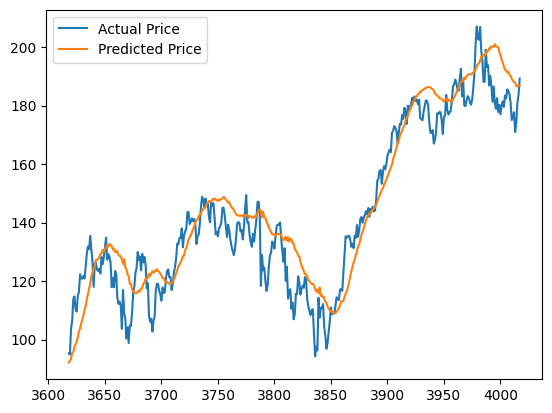

In [19]:
plt.figure()
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mean_squared_error(predictions, y_test)

98.10775819433151

In [22]:
import numpy as np

In [23]:
np.sqrt(mean_squared_error(predictions, y_test))

np.float64(9.904936052006168)

In [24]:
model.coef_

array([ 9.99966954,  1.03826173, -0.153609  ])

In [25]:
model.intercept_

np.float64(-0.09410402121657668)

## Using Neural Networks (LSTM)

### Standardization

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
X_train.head(2)

Price   Returns       SMA  Volatility
20     0.010260  0.396531    0.028827
21     0.008363  0.394376    0.028641

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.29353427, -0.5617504 ,  0.25112103],
       [ 0.22672541, -0.56189194,  0.23557617],
       [-2.11311615, -0.56211628,  0.42065388],
       ...,
       [ 1.19460418,  5.10066391,  0.96254556],
       [-0.16877136,  5.13246828,  0.9675035 ],
       [-0.7697767 ,  5.18590986,  0.23756305]], shape=(3598, 3))

In [30]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.80863711,  5.23601283,  0.16586088],
       [ 0.15734653,  5.27856849,  0.10261118],
       [-0.22891018,  5.32870757, -0.02950762],
       ...,
       [ 0.5915794 , 11.21405005, -0.55815889],
       [ 1.317848  , 11.21523268, -0.47260125],
       [ 0.45764   , 11.231064  , -0.46358384]], shape=(400, 3))

In [31]:
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1,1))
y_train_scaled


array([[-0.55590361],
       [-0.55731862],
       [-0.55685657],
       ...,
       [ 5.36078691],
       [ 5.24241662],
       [ 5.38729397]], shape=(3598, 1))

In [32]:
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1,1))
y_test_scaled

array([[ 5.4254486 ],
       [ 5.39799763],
       [ 5.95515148],
       [ 6.12326053],
       [ 6.59119691],
       [ 6.64937325],
       [ 6.37706131],
       [ 6.3224732 ],
       [ 6.66039171],
       [ 6.75086886],
       [ 7.12883272],
       [ 7.03804029],
       [ 7.0311147 ],
       [ 7.08790641],
       [ 7.03312557],
       [ 7.30325554],
       [ 7.58094214],
       [ 7.72387927],
       [ 7.66720771],
       [ 7.95685764],
       [ 7.65461478],
       [ 7.38952064],
       [ 6.8568154 ],
       [ 7.35929558],
       [ 7.3788165 ],
       [ 7.22706355],
       [ 7.19872969],
       [ 7.24658543],
       [ 7.14394741],
       [ 7.49719496],
       [ 7.34292506],
       [ 7.49215721],
       [ 7.6923955 ],
       [ 7.9146707 ],
       [ 7.44178404],
       [ 7.55764603],
       [ 7.5072695 ],
       [ 7.37629763],
       [ 6.84925973],
       [ 7.04445883],
       [ 6.84548166],
       [ 7.19872969],
       [ 7.13890966],
       [ 6.61376104],
       [ 6.48971523],
       [ 6

In [33]:
X_train_lst = []
y_train_lst = []

for i in range(60, len(X_train_scaled)):
    X_train_lst.append(X_train_scaled[i-60:i, :])
    y_train_lst.append(y_train_scaled[i,0])

In [34]:
X_train_lst

[array([[ 2.93534272e-01, -5.61750402e-01,  2.51121026e-01],
        [ 2.26725413e-01, -5.61891936e-01,  2.35576171e-01],
        [-2.11311615e+00, -5.62116283e-01,  4.20653878e-01],
        [ 6.41105677e-01, -5.62288684e-01,  4.62267035e-01],
        [-1.33058029e-01, -5.62466355e-01,  4.58662200e-01],
        [-3.50754290e-01, -5.62634239e-01,  4.54557991e-01],
        [ 6.12101213e-01, -5.62732108e-01,  4.34867495e-01],
        [ 1.54611479e+00, -5.62791583e-01,  5.78924141e-01],
        [ 4.05370306e-01, -5.62812662e-01,  5.78613322e-01],
        [ 5.81849962e-01, -5.62770503e-01,  5.36692421e-01],
        [ 2.71037403e-01, -5.62739636e-01,  5.21358325e-01],
        [-2.37825771e+00, -5.62791583e-01,  8.02848584e-01],
        [-2.58078620e-01, -5.62826967e-01,  7.86467162e-01],
        [-4.13645106e-03, -5.62815674e-01,  7.10096611e-01],
        [-9.16248379e-01, -5.62855574e-01,  7.28677877e-01],
        [ 6.70994621e-01, -5.62829978e-01,  6.90584920e-01],
        [-3.87164926e-01

In [35]:
y_train_lst

[np.float64(-0.557592963342215),
 np.float64(-0.5578384177823587),
 np.float64(-0.5589790901466427),
 np.float64(-0.5593400560925126),
 np.float64(-0.5597732355032726),
 np.float64(-0.5601197700204512),
 np.float64(-0.5592534262179801),
 np.float64(-0.5594844492294325),
 np.float64(-0.559080160836772),
 np.float64(-0.5591234738966571),
 np.float64(-0.561563652577742),
 np.float64(-0.5615203338857135),
 np.float64(-0.5621412063516108),
 np.float64(-0.5618524294646764),
 np.float64(-0.5622855957337686),
 np.float64(-0.561895750034086),
 np.float64(-0.5624299851159263),
 np.float64(-0.5619535001548057),
 np.float64(-0.5618668702802733),
 np.float64(-0.5607839499140901),
 np.float64(-0.5613037535672392),
 np.float64(-0.5621123247204171),
 np.float64(-0.5619101852175395),
 np.float64(-0.56193906121659),
 np.float64(-0.5628053937547742),
 np.float64(-0.5636717262929585),
 np.float64(-0.5641337741932445),
 np.float64(-0.5645236217703081),
 np.float64(-0.563888308488814),
 np.float64(-0.563512

In [36]:
X_train_scaled_np = np.array(X_train_lst)
X_train_scaled_np.shape

(3538, 60, 3)

In [37]:
y_train_scaled_np = np.array(y_train_lst)
y_train_scaled_np.shape

(3538,)

### Building the Model

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

/Users/tanishqsharma/Desktop/Development/Projects/fintelligence/.venv/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [39]:
def make_results_deterministic():
    SEED = 42
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

In [40]:
input_shape = (60, 3)

In [41]:
lstm_model = Sequential([
    tf.keras.Input(input_shape),
    LSTM(units=128,return_sequences=True),
    LSTM(units=64),
    Dense(units=1, activation='linear'),
])

In [42]:
lstm_model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

In [43]:
lstm_model.fit(
    X_train_scaled_np,
    y_train_scaled_np,
    epochs = 10,
    batch_size = 32
)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0465
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0059
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0049
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0040
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0031
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0037
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0027
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0029
Epoch 9/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0038
Epoch 10/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0030


In [44]:
X_test_scaled.shape

(400, 3)

In [45]:
X_train_scaled[-60:].shape

(60, 3)

In [46]:
test_augment_train = np.concatenate([X_train_scaled[-60:], X_test_scaled])
test_augment_train.shape

(460, 3)

In [47]:
X_test_scaled_np = []
for i in range(60, len(test_augment_train)):
    X_test_scaled_np.append(test_augment_train[i-60:i, :])

In [48]:
X_test_scaled_np

[array([[ 0.05725947,  3.95624369,  1.47346857],
        [ 0.0550286 ,  4.01553264,  1.45149285],
        [-0.24205158,  4.06883059,  1.46279055],
        [-0.53251481,  4.11770678,  1.49251065],
        [ 0.58937678,  4.17543311,  1.44100858],
        [ 1.34235148,  4.23863168,  1.47037881],
        [ 1.1985885 ,  4.30125575,  1.42961389],
        [ 0.23425035,  4.35586694,  1.36544249],
        [ 1.05331956,  4.42310051,  1.34089748],
        [ 1.50843197,  4.49720538,  1.38022128],
        [-2.02223577,  4.55593654,  1.60151079],
        [-0.77383213,  4.60072906,  1.6186778 ],
        [ 2.4534433 ,  4.66529758,  1.78767242],
        [-0.46074395,  4.72689509,  1.80478099],
        [-1.20898498,  4.7730109 ,  1.88435553],
        [-0.11074945,  4.82285258,  1.85689972],
        [ 0.1799719 ,  4.87487083,  1.85157341],
        [ 0.30766636,  4.9403614 ,  1.7052873 ],
        [ 0.31592324,  5.0155492 ,  1.61582342],
        [ 0.34647849,  5.05790032,  0.22632422],
        [ 1.03169938

In [49]:
X_test_scaled_np = np.array(X_test_scaled_np)
X_test_scaled_np

array([[[ 0.05725947,  3.95624369,  1.47346857],
        [ 0.0550286 ,  4.01553264,  1.45149285],
        [-0.24205158,  4.06883059,  1.46279055],
        ...,
        [ 1.19460418,  5.10066391,  0.96254556],
        [-0.16877136,  5.13246828,  0.9675035 ],
        [-0.7697767 ,  5.18590986,  0.23756305]],

       [[ 0.0550286 ,  4.01553264,  1.45149285],
        [-0.24205158,  4.06883059,  1.46279055],
        [-0.53251481,  4.11770678,  1.49251065],
        ...,
        [-0.16877136,  5.13246828,  0.9675035 ],
        [-0.7697767 ,  5.18590986,  0.23756305],
        [ 0.80863711,  5.23601283,  0.16586088]],

       [[-0.24205158,  4.06883059,  1.46279055],
        [-0.53251481,  4.11770678,  1.49251065],
        [ 0.58937678,  4.17543311,  1.44100858],
        ...,
        [-0.7697767 ,  5.18590986,  0.23756305],
        [ 0.80863711,  5.23601283,  0.16586088],
        [ 0.15734653,  5.27856849,  0.10261118]],

       ...,

       [[-0.35614191, 10.91452514, -0.37830736],
        [ 0

In [50]:
y_pred_scaled_np = lstm_model.predict(X_test_scaled_np)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [51]:
y_pred_scaled_np

array([[5.0425014],
       [5.055437 ],
       [5.0347214],
       [4.997678 ],
       [5.1136537],
       [5.1091337],
       [5.178764 ],
       [5.1519284],
       [5.0827427],
       [5.077053 ],
       [5.148784 ],
       [5.157716 ],
       [5.218755 ],
       [5.188894 ],
       [5.18854  ],
       [5.2019424],
       [5.1982155],
       [5.2505856],
       [5.289712 ],
       [5.3005276],
       [5.2845488],
       [5.325364 ],
       [5.2802105],
       [5.261928 ],
       [5.2077546],
       [5.323781 ],
       [5.3336287],
       [5.320417 ],
       [5.3287563],
       [5.34583  ],
       [5.3337398],
       [5.393098 ],
       [5.3587418],
       [5.380565 ],
       [5.4020505],
       [5.4200315],
       [5.3461103],
       [5.376298 ],
       [5.372097 ],
       [5.3579664],
       [5.292921 ],
       [5.350912 ],
       [5.3314095],
       [5.4026327],
       [5.3843465],
       [5.300273 ],
       [5.298646 ],
       [5.323637 ],
       [5.3165436],
       [5.243951 ],


In [52]:
y_pred_lstm = target_scaler.inverse_transform(y_pred_scaled_np)
y_pred_lstm

array([[89.25829 ],
       [89.46364 ],
       [89.13479 ],
       [88.546745],
       [90.387794],
       [90.31605 ],
       [91.42138 ],
       [90.995384],
       [89.8971  ],
       [89.806786],
       [90.94547 ],
       [91.08726 ],
       [92.05621 ],
       [91.58219 ],
       [91.57657 ],
       [91.78933 ],
       [91.73016 ],
       [92.56151 ],
       [93.18262 ],
       [93.35431 ],
       [93.100655],
       [93.74857 ],
       [93.031784],
       [92.74156 ],
       [91.88159 ],
       [93.72344 ],
       [93.87977 ],
       [93.670044],
       [93.80242 ],
       [94.073456],
       [93.88153 ],
       [94.82381 ],
       [94.27843 ],
       [94.62486 ],
       [94.96593 ],
       [95.251366],
       [94.07791 ],
       [94.55712 ],
       [94.49043 ],
       [94.26612 ],
       [93.23356 ],
       [94.15414 ],
       [93.84454 ],
       [94.97517 ],
       [94.68488 ],
       [93.350266],
       [93.32444 ],
       [93.72116 ],
       [93.60855 ],
       [92.456184],


In [53]:
mse = mean_squared_error(np.array(y_test), y_pred_lstm[:,0])
mse

3002.225998417428

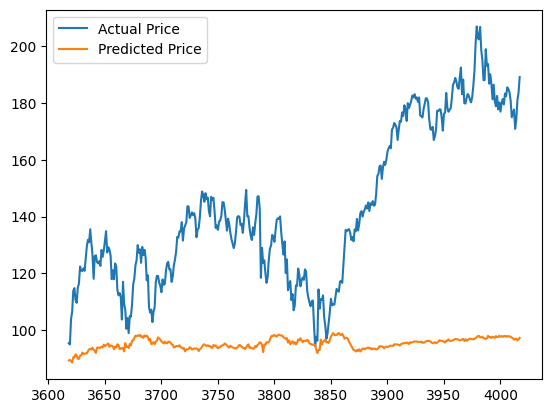

In [54]:
plt.figure()
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred_lstm[:,0], label='Predicted Price')
plt.legend()
plt.show()

In [ ]:
y_test.index

In [ ]:
X_test